<a href="https://colab.research.google.com/github/frankthairu/CNN-on-MIST-dataset-python/blob/main/Part_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

## Importing Relevant Libraries


In [ ]:
# imported relevant libraries
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow. keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dropout 
from tensorflow. keras.utils import plot_model 
from matplotlib import pyplot 
import matplotlib.pyplot as plt 
import numpy as np


In [ ]:
#loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()




11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#reshaping the training and testing data
x_train = x_train. reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 
x_test.shape [2], 1))



In [ ]:
#normalizing the values of pixels
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


 

## Data Exploration

In [ ]:
type(x_train)
# Images are encoded as numpy arrays

numpy.ndarray

In [ ]:
x_train.dtype
# images are assigned to the float datatype

dtype('float32')

In [ ]:
x_train.shape


(60000, 28, 28, 1)

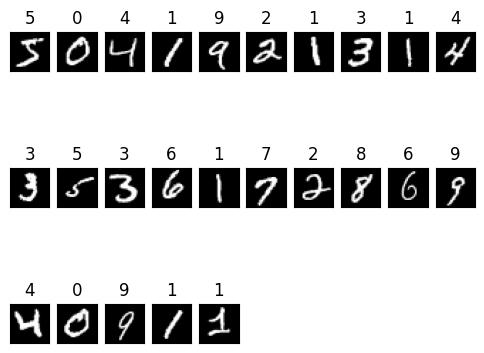

In [ ]:
fig = plt.figure(figsize= (6,5))
for i in range (25):
  ax = fig.add_subplot(3,10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray') 
  ax.set_title(y_train[i])

# Taking an example I am Plotting first 25 set of images

In [ ]:
#Checking shape of the example above
image_shape= x_train.shape[1:]
image_shape

# This gives a shape 0f 28 * 28 * 1 (1 being the value of the color i.e grey scale color)


(28, 28, 1)

## Defining the model

In [ ]:
#Building the model

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1 )))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu')) 
model.add(MaxPool2D((2, 2)))
model.add(Dropout (0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu', input_shape=(28*28, )))
model.add(Dense (10, activation='softmax'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

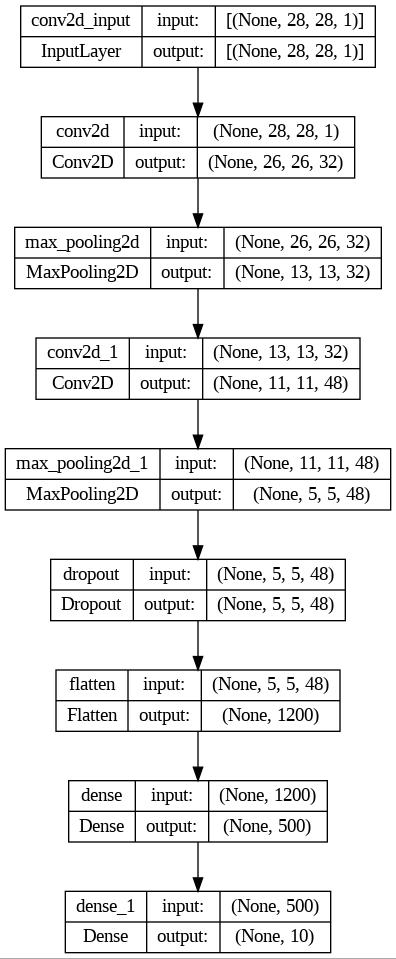

In [ ]:
plot_model(model, 'model.jpg', show_shapes=True)

* A convolutional input layerhas been made where input size is given and output size is given.





* We can be able to see how each layer is connected to the other layer in the sequence.

##Compilation Phase



In [ ]:
model. compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [ ]:
batch_size = 126
total_steps = 200
steps_per_epoch = min(total_steps, len(x_train) // batch_size)

# Train the model using the step method
model.fit(x_train, y_train, batch_size=batch_size, steps_per_epoch=steps_per_epoch, epochs=total_steps // steps_per_epoch)



200/200 [==============================] - 22s 105ms/step - loss: 0.3822 - accuracy: 0.8823


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print (f'Accuracy: {accuracy*100}')



Accuracy: 97.25000262260437


We reach a good accuracy of 96.7%

